In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
%ls -l MyDrive/MLData

total 92336
-rw------- 1 root root 11246869 Feb 28 09:02 cov.tar.gz
-rw------- 1 root root 83304232 Feb 28 10:19 covtype.data.csv


In [ ]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
dataset = pd.read_csv("MyDrive/MLData/covtype.data.csv")

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  int64  
 7   Hillshade_Noon                      581012 non-null  int64  
 8   Hillshade_3pm                       581012 non-null  int64  
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  Wilderness_Area1                    581012 non-null  int64  
 11  Wilderness_Area2          

In [ ]:
dataset.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221,232,148,6279.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220,235,151,6225.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234,238,135,6121.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238,238,122,6211.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220,234,150,6172.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [ ]:
dataset.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

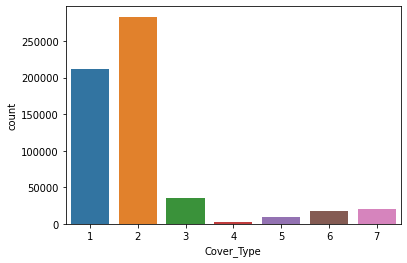

In [ ]:
sns.countplot(x=dataset['Cover_Type'], label='Count')
plt.show()

In [ ]:
#Splitting dataset
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = \
  train_test_split(x,y,test_size=0.1,random_state=0)

In [ ]:
len(x_train[0])

54

In [ ]:
acc_table={}
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier
class_rm = RandomForestClassifier(random_state=0, class_weight='balanced')
class_rm.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=0)

In [ ]:
#Metrics and Cross Validation
from sklearn.metrics import accuracy_score,\
  confusion_matrix, f1_score, precision_score,recall_score
y_pred = class_rm.predict(x_test)
acc  = accuracy_score (y_test,y_pred)
#f1   = f1_score       (y_test,y_pred)
#prec = precision_score(y_test,y_pred)
#rec  = recall_score   (y_test,y_pred)
acc_table['RandomForest']=acc

In [ ]:
acc

0.9588998657533303

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[20021,  1008,     1,     0,     3,     3,    36],
       [  583, 27733,    57,     0,    37,    25,     6],
       [    0,    61,  3427,    10,     4,    65,     0],
       [    0,     0,    36,   256,     0,     5,     0],
       [    6,   166,     7,     0,   742,     4,     0],
       [    1,    50,   109,     9,     0,  1580,     0],
       [   77,    19,     0,     0,     0,     0,  1955]])

Text(0.5, 15.0, 'Predicted Values')

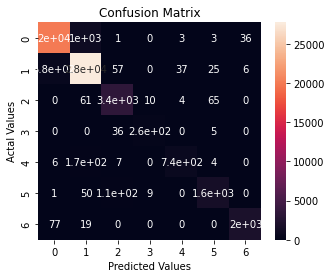

In [ ]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,index = range(7), 
                      columns = range(7))
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')

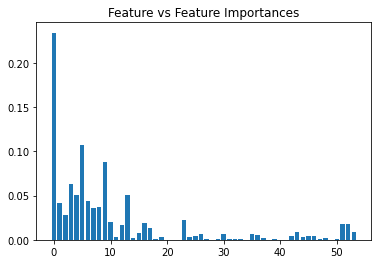

In [ ]:
fig, ax = plt.subplots()
ax.bar(np.arange(54),class_rm.feature_importances_)
ax.set_title("Feature vs Feature Importances")
plt.show()

In [ ]:
dataset.columns[:-1]

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [ ]:
#Gradient Boosted Decison Trees Model
#from sklearn.ensemble import GradientBoostingClassifier
#class_gb = GradientBoostingClassifier(random_state=0, n_estimators=20)
#class_gb.fit(x_train,y_train)
#--------------Long runtime----------
#Hist Gradient Boosted Decison Trees Model
from sklearn.tree import DecisionTreeClassifier
class_dt = DecisionTreeClassifier(random_state=0)
class_dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred = class_dt.predict(x_test)
acc  = accuracy_score (y_test,y_pred)
acc
acc_table['DecisionTree']=acc

In [ ]:
from sklearn.neural_network import MLPClassifier
layers = [54,20,20]
class_mlp = MLPClassifier(random_state=0,hidden_layer_sizes=layers,
                          )
class_mlp.fit(x_train[::15],y_train[::15])

MLPClassifier(hidden_layer_sizes=[54, 20, 20], random_state=0)

In [ ]:
y_pred_train= class_mlp.predict(x_train)
y_pred_test = class_mlp.predict(x_test)
acc_ts = accuracy_score(y_test,y_pred_test)
acc_ts
acc_tr = accuracy_score(y_train,y_pred_train)
print("Accuracy Train: {:5f} Test {:5f}".format(acc_tr,acc_ts))
acc_table['NeuralNet']=acc_ts

Accuracy Train: 0.733989 Test 0.734123


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
class_adb = AdaBoostClassifier(random_state=0,base_estimator=class_dt)
class_adb.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=0),
                   random_state=0)

In [ ]:
print(class_adb)
y_pred_train= class_adb.predict(x_train)
y_pred_test = class_adb.predict(x_test)
acc_ts = accuracy_score(y_test,y_pred_test)
acc_ts
acc_tr = accuracy_score(y_train,y_pred_train)
print("Accuracy Train: {:5f} Test {:5f}".format(acc_tr,acc_ts))
acc_table['AdaBoost']=acc_ts


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=0),
                   random_state=0)
Accuracy Train: 1.000000 Test 0.942962


In [ ]:
acc_table
results = pd.DataFrame.from_dict(acc_table,orient='index',
                               columns=['Accuracy'] )


In [ ]:
results

,Accuracy
RandomForest,0.958900
DecisionTree,0.943479
NeuralNet,0.734123
AdaBoost,0.942962
